# **Group Assignment** - Bike Sharing

- `instant`: record index
- `dteday` : date
- `season` : season 1:winter, 2:spring, 3:summer, 4:fall
- `yr` : year (0: 2011, 1:2012)
- `mnth` : month ( 1 to 12)
- `hr` : hour (0 to 23)
- `holiday` : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- `weekday` : day of the week
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
+ `weathersit` : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp` : Normalized temperature in Celsius. The values are divided to 41 (max)
- `atemp`: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- `hum`: Normalized humidity. The values are divided to 100 (max)
- `windspeed`: Normalized wind speed. The values are divided to 67 (max)
- `casual`: count of casual users
- `registered`: count of registered users
- `cnt`: count of total rental bikes including both casual and registered

## PART I: Exploratory Data Analysis

In [2]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
import numpy as np

In [3]:
data = pd.read_csv('/Users/constantinwiederin/Documents/IE/Python2/Group_Project/Data/bike-sharing-hourly.csv')

In [4]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
data.shape

(17379, 17)

In [6]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
data.duplicated().sum()

0

In [9]:
#display the number of unique values in each column
data.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [9]:
data = data.drop(columns=['instant','dteday'])

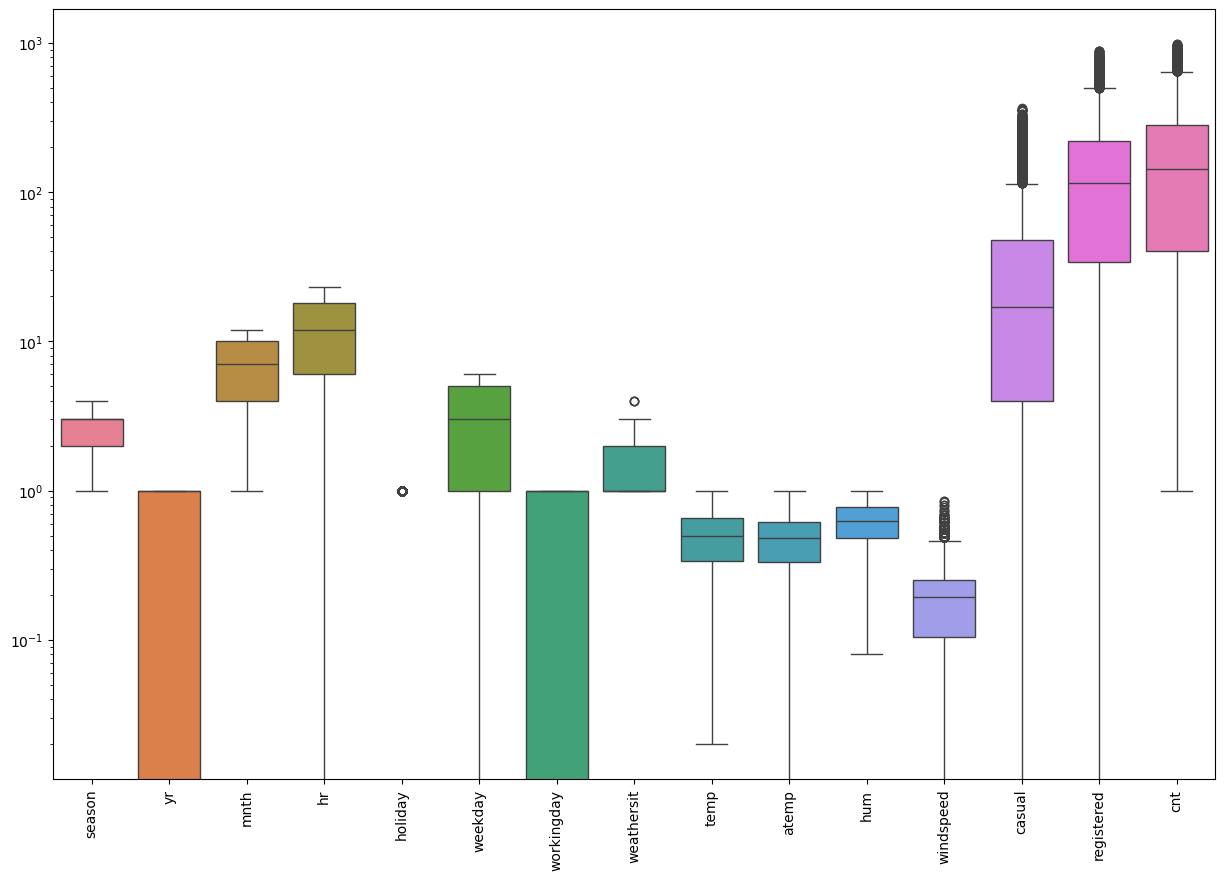

In [11]:
# I want to create a box plot of my data to see the distribution of the data
plt.figure(figsize=(15, 10))
sns.boxplot(data=data)
plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.xticks(rotation=90)
plt.show()


In [12]:
z_scores = stats.zscore(data)

# Print the z-scores
z_scores

# Convert the z-scores to absolute values
abs_z_scores = np.abs(z_scores)

# count for each column the number of outliers and print for each column the number of outliers
outliers = (abs_z_scores > 3).sum()
outliers



season          0
yr              0
mnth            0
hr              0
holiday       500
weekday         0
workingday      0
weathersit      3
temp            0
atemp           1
hum            22
windspeed     107
casual        467
registered    371
cnt           244
dtype: int64

#### No need to clamp as it is very little number of outliers and with high probability we use a tree algorithm no need to take care fo these few outlier

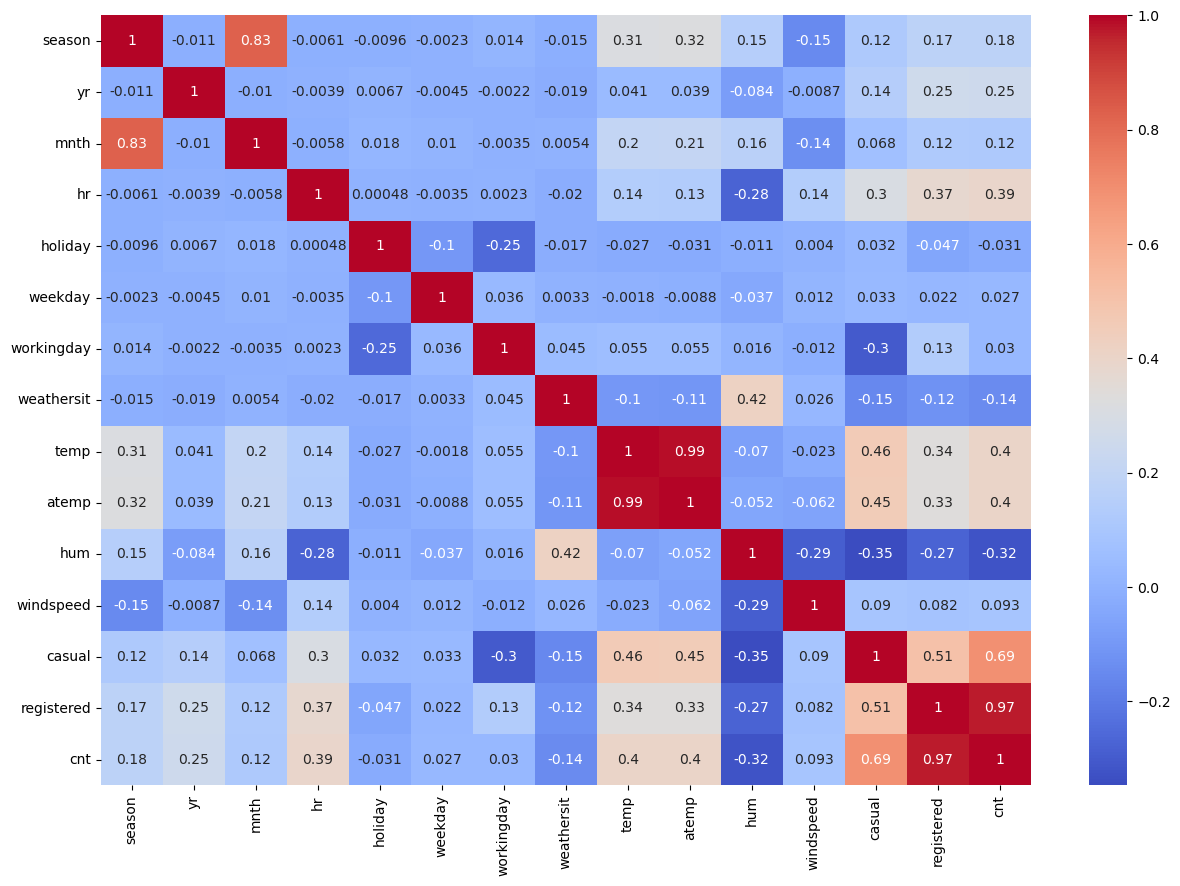

In [13]:
# I want to create a correlation matrix to see the relationship between the variables
correlation_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# I want to create a pairplot to see the relationship between the variables
#sns.pairplot(data)
#plt.show()


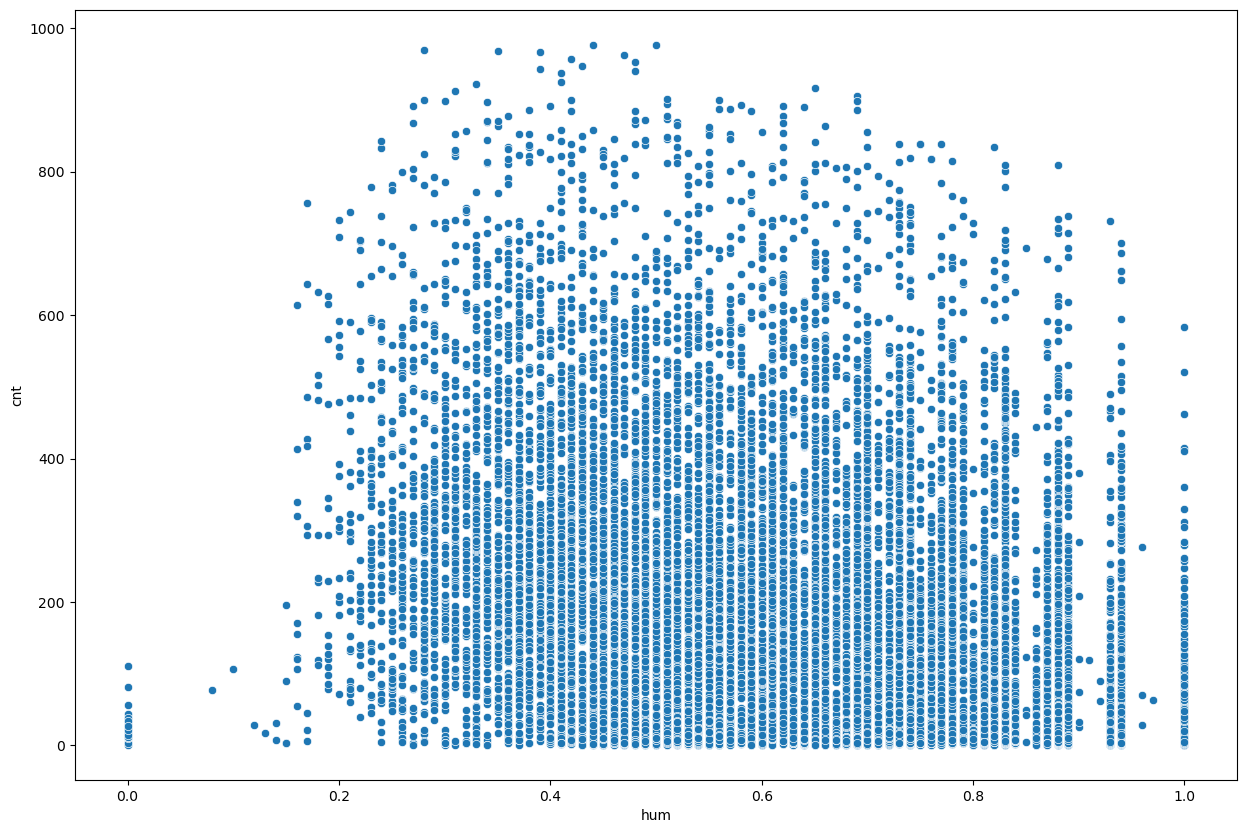

In [14]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='hum', y='cnt', data=data)
plt.show()

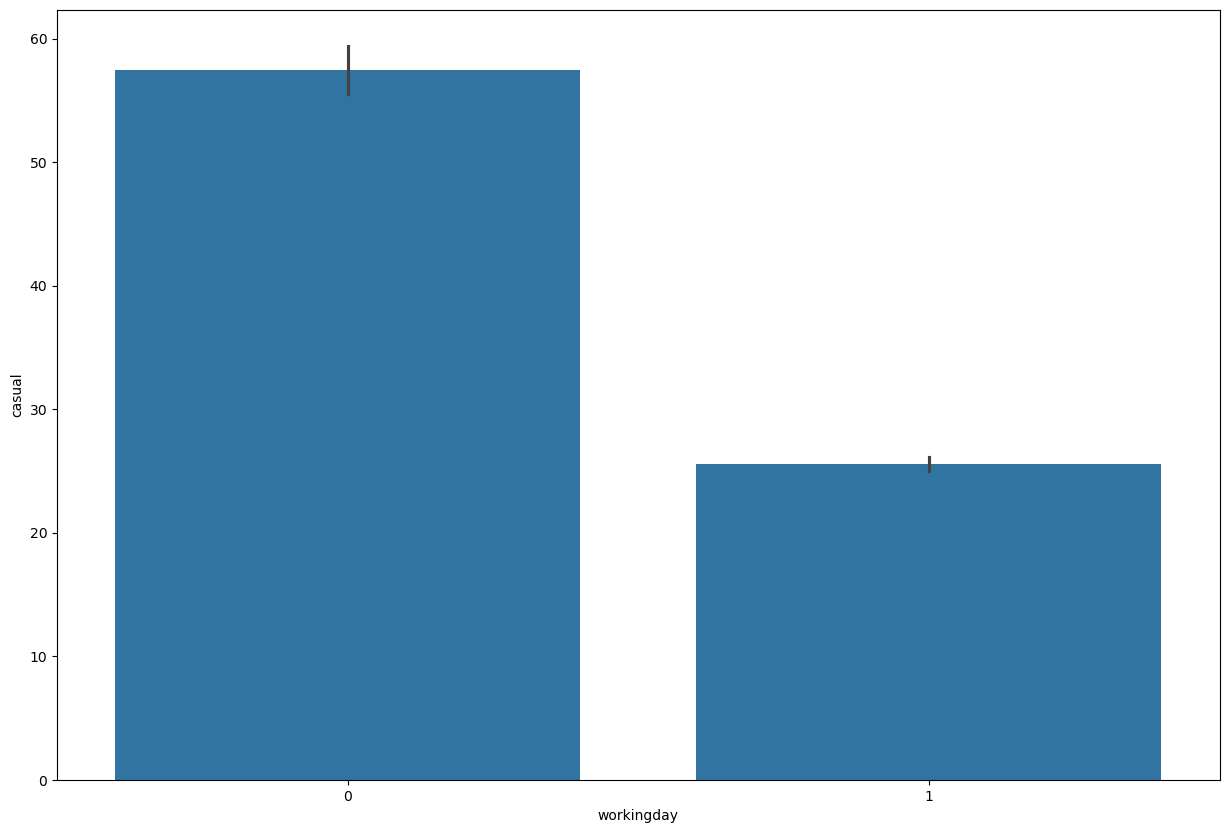

In [15]:
#plot the total number of causal users vs if workingday
plt.figure(figsize=(15, 10))
sns.barplot(x='workingday', y='casual', data=data)
plt.show()

In [16]:
data.dtypes

season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [10]:
# dummify holiday, weekday, weathersit, workingday
data = pd.get_dummies(data, columns=['holiday', 'weekday', 'weathersit', 'workingday'])

In [18]:
data.columns

Index(['season', 'yr', 'mnth', 'hr', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'holiday_0', 'holiday_1', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weathersit_1', 'weathersit_2', 'weathersit_3',
       'weathersit_4', 'workingday_0', 'workingday_1'],
      dtype='object')

In [11]:
#create 2 new features that are the lagged data of the cnt column by 1 and 2 hours
#data['cnt_lag1'] = data['cnt'].shift(1)
#data['cnt_lag2'] = data['cnt'].shift(2)

#create 4 new features that are the lagged data of the casual and registered column by 1 and 2 hours
#data['casual_lag1'] = data['casual'].shift(1)
#data['casual_lag2'] = data['casual'].shift(2)
#data['registered_lag1'] = data['registered'].shift(1)
#data['registered_lag2'] = data['registered'].shift(2)

#create new features that are the lagged data of the cnt,casual and registered column by 1 and 2 days
data['cnt_lag24'] = data['cnt'].shift(24)
data['casual_lag24'] = data['casual'].shift(24)
data['registered_lag24'] = data['registered'].shift(24)
data['cnt_lag48'] = data['cnt'].shift(48)
data['casual_lag48'] = data['casual'].shift(48)
data['registered_lag48'] = data['registered'].shift(48)

#create feature that is the rolling average of the cnt column over the last 1,2,3,4,5,6,7,8,9,10,11,12,24,48 hours
#data['cnt_rolling_avg_2'] = data['cnt'].rolling(window=2).mean()
#data['cnt_rolling_avg_3'] = data['cnt'].rolling(window=3).mean()
#data['cnt_rolling_avg_4'] = data['cnt'].rolling(window=4).mean()
#data['cnt_rolling_avg_5'] = data['cnt'].rolling(window=5).mean()
#data['cnt_rolling_avg_6'] = data['cnt'].rolling(window=6).mean()
#data['cnt_rolling_avg_7'] = data['cnt'].rolling(window=7).mean()
#data['cnt_rolling_avg_8'] = data['cnt'].rolling(window=8).mean()
#data['cnt_rolling_avg_9'] = data['cnt'].rolling(window=9).mean()
#data['cnt_rolling_avg_10'] = data['cnt'].rolling(window=10).mean()
#data['cnt_rolling_avg_11'] = data['cnt'].rolling(window=11).mean()
data['cnt_rolling_avg_12'] = data['cnt'].rolling(window=12).mean()
data['cnt_rolling_avg_24'] = data['cnt'].rolling(window=24).mean()
data['cnt_rolling_avg_48'] = data['cnt'].rolling(window=48).mean()

#create random variable
data['random'] = random.sample(range(1, 17380), data.shape[0])

#Create feature that is called ridability which is a combination of the temperature, humidity, windspeed and weathersit
data['ridability'] = data['temp'] * (1/(data['hum']+0.01)) * (1/(data['windspeed']+0.01)) * (data['weathersit_1'] * 100 +0.01) * (data['weathersit_2'] * 64 +0.01) * (data['weathersit_3'] * 32 +0.01) * (data['weathersit_4'] * 15 +0.01)


## PART II: Prediction Model

In [20]:
data.dtypes

season                  int64
yr                      int64
mnth                    int64
hr                      int64
temp                  float64
atemp                 float64
hum                   float64
windspeed             float64
casual                  int64
registered              int64
cnt                     int64
holiday_0               uint8
holiday_1               uint8
weekday_0               uint8
weekday_1               uint8
weekday_2               uint8
weekday_3               uint8
weekday_4               uint8
weekday_5               uint8
weekday_6               uint8
weathersit_1            uint8
weathersit_2            uint8
weathersit_3            uint8
weathersit_4            uint8
workingday_0            uint8
workingday_1            uint8
cnt_lag24             float64
casual_lag24          float64
registered_lag24      float64
cnt_lag48             float64
casual_lag48          float64
registered_lag48      float64
cnt_rolling_avg_12    float64
cnt_rollin

In [21]:
data.isnull().sum()

season                 0
yr                     0
mnth                   0
hr                     0
temp                   0
atemp                  0
hum                    0
windspeed              0
casual                 0
registered             0
cnt                    0
holiday_0              0
holiday_1              0
weekday_0              0
weekday_1              0
weekday_2              0
weekday_3              0
weekday_4              0
weekday_5              0
weekday_6              0
weathersit_1           0
weathersit_2           0
weathersit_3           0
weathersit_4           0
workingday_0           0
workingday_1           0
cnt_lag24             24
casual_lag24          24
registered_lag24      24
cnt_lag48             48
casual_lag48          48
registered_lag48      48
cnt_rolling_avg_12    11
cnt_rolling_avg_24    23
cnt_rolling_avg_48    47
random                 0
ridability             0
dtype: int64

In [12]:
data.dropna(inplace=True)

## Splitting data



In [13]:
# define the features and target variable
X = data.drop(columns=['cnt', 'casual', 'registered'])
y = data['cnt']
Y = data[['casual', 'registered']]

#split the data into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=False)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

## Scale Data

In [14]:
#scale the data using the robust scaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)



## Predicting registered and casual users

In [15]:
# initiate decision tree regressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
import joblib
import numpy as np
#import linear regression
from sklearn.linear_model import LinearRegression

#initiate the decision tree regressor
dt = DecisionTreeRegressor()
#initiate the linear regression
lr = LinearRegression()

#Now train the model using the training sets
dt.fit(X_train, Y_train)
lr.fit(X_train, Y_train)

#predict the response on the training set
y_pred_dt = dt.predict(X_train)
y_pred_lr = lr.predict(X_train)

#predict the response on the testing set
y_pred_dt_test = dt.predict(X_test)
y_pred_lr_test = lr.predict(X_test)

#calculate the mean squared error of the model
mse_dt = mean_squared_error(Y_train, y_pred_dt)
mse_lr = mean_squared_error(Y_train, y_pred_lr)

#calculate the mean squared error of the model
mse_dt_test = mean_squared_error(Y_test, y_pred_dt_test)
mse_lr_test = mean_squared_error(Y_test, y_pred_lr_test)

print('Mean Squared Error of the Decision Tree model on the training set:', mse_dt)
print('Mean Squared Error of the Linear Regression model on the training set:', mse_lr)

print('Mean Squared Error of the Decision Tree model on the testing set:', mse_dt_test)
print('Mean Squared Error of the Linear Regression model on the testing set:', mse_lr_test)

#print feature importances
df_importances = pd.DataFrame({'feature': X.columns, 'importance': dt.feature_importances_})

df_importances.sort_values(by='importance', ascending=False, inplace=True)
df_importances['importance'] = df_importances['importance'].map('{:.3}'.format)
df_importances

Mean Squared Error of the Decision Tree model on the training set: 0.0
Mean Squared Error of the Linear Regression model on the training set: 3232.957168883708
Mean Squared Error of the Decision Tree model on the testing set: 3445.6654167868473
Mean Squared Error of the Linear Regression model on the testing set: 5912.358154247797


,feature,importance
23,cnt_lag24,0.402
3,hr,0.161
25,registered_lag24,0.143
29,cnt_rolling_avg_12,0.0742
22,workingday_1,0.054
30,cnt_rolling_avg_24,0.0351
11,weekday_1,0.0217
33,ridability,0.013
24,casual_lag24,0.0113
31,cnt_rolling_avg_48,0.0112


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Initiate Random Forest Regressor
model = RandomForestRegressor()

# Train the model
model.fit(X_train, Y_train)

# Calculate mean squared error of the train and test set and print feature importances
y_pred_rf = model.predict(X_train)
y_pred_rf_test = model.predict(X_test)

mse_rf = mean_squared_error(Y_train, y_pred_rf)
mse_rf_test = mean_squared_error(Y_test, y_pred_rf_test)

print('Mean Squared Error of the Random Forest model on the training set:', mse_rf)
print('Mean Squared Error of the Random Forest model on the testing set:', mse_rf_test)

df_importances_rf = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})

df_importances_rf.sort_values(by='importance', ascending=False, inplace=True)
df_importances_rf['importance'] = df_importances_rf['importance'].map('{:.3}'.format)
df_importances_rf

Mean Squared Error of the Random Forest model on the training set: 93.80128973961371
Mean Squared Error of the Random Forest model on the testing set: 1997.3922824055385


,feature,importance
23,cnt_lag24,0.405
3,hr,0.158
25,registered_lag24,0.14
29,cnt_rolling_avg_12,0.07
30,cnt_rolling_avg_24,0.0383
21,workingday_0,0.0316
22,workingday_1,0.0312
11,weekday_1,0.0175
24,casual_lag24,0.0146
33,ridability,0.0129


In [27]:
#initiate XGBoost Regressor
import xgboost as xgb


model = xgb.XGBRegressor()
model.fit(X_train, Y_train)
    
# Calculate mean squared error of the train and test set and print feature importances
y_pred_xgb = model.predict(X_train)
y_pred_xgb_test = model.predict(X_test)

mse_xgb = mean_squared_error(Y_train, y_pred_xgb)
mse_xgb_test = mean_squared_error(Y_test, y_pred_xgb_test)

print('Mean Squared Error of the XGBoost model on the training set:', mse_xgb)
print('Mean Squared Error of the XGBoost model on the testing set:', mse_xgb_test)

df_importances_xgb = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
df_importances_xgb.sort_values(by='importance', ascending=False, inplace=True)
df_importances_xgb['importance'] = df_importances_xgb['importance'].map('{:.3}'.format)
df_importances_xgb

Mean Squared Error of the XGBoost model on the training set: 147.7273544446465
Mean Squared Error of the XGBoost model on the testing set: 1777.2475821738299


,feature,importance
25,registered_lag24,0.245
23,cnt_lag24,0.125
21,workingday_0,0.121
19,weathersit_3,0.0995
11,weekday_1,0.0994
3,hr,0.0577
16,weekday_6,0.0422
10,weekday_0,0.029
24,casual_lag24,0.0277
29,cnt_rolling_avg_12,0.0231


In [28]:
#GridsearchCV for random forest
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [300, 350],
    'max_depth': [20, 25],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 3]
}

# Initiate the random forest regressor
model = RandomForestRegressor()

# Initiate the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)

# Fit the grid search
grid_search.fit(X_train, Y_train)

# Print the best parameters
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

# Calculate mean squared error of the train and test set and print feature importances
y_pred_rf = grid_search.best_estimator_.predict(X_train)
y_pred_rf_test = grid_search.best_estimator_.predict(X_test)

mse_rf = mean_squared_error(Y_train, y_pred_rf)
mse_rf_test = mean_squared_error(Y_test, y_pred_rf_test)

print('Mean Squared Error of the Random Forest model on the training set:', mse_rf)
print('Mean Squared Error of the Random Forest model on the testing set:', mse_rf_test)

df_importances_rf = pd.DataFrame({'feature': X.columns, 'importance': grid_search.best_estimator_.feature_importances_})
df_importances_rf.sort_values(by='importance', ascending=False, inplace=True)
df_importances_rf['importance'] = df_importances_rf['importance'].map('{:.3}'.format)
df_importances_rf

Fitting 2 folds for each of 16 candidates, totalling 32 fits


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=300; total time=  22.2s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=300; total time=  22.8s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  23.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  24.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=350; total time=  25.8s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=350; total time=  27.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=350; total time=  27.1s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=350; total time=  27.9s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=  20.8s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total tim

,feature,importance
23,cnt_lag24,0.409
3,hr,0.156
25,registered_lag24,0.142
29,cnt_rolling_avg_12,0.0695
30,cnt_rolling_avg_24,0.0382
21,workingday_0,0.0319
22,workingday_1,0.0311
11,weekday_1,0.0181
24,casual_lag24,0.0138
33,ridability,0.0123


In [31]:
#GridsearchCV for XGBoost
from sklearn.model_selection import GridSearchCV

#hide warnings
import warnings
warnings.filterwarnings('ignore')

# Define the parameter grid
param_grid = {
    'n_estimators': [320, 300],
    'max_depth': [20, 25],
    'learning_rate': [0.03, 0.05, 0.08]
}

# Initiate the random forest regressor
model = xgb.XGBRegressor()

# Initiate the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)


# Fit the grid search
grid_search.fit(X, Y)

# Print the best parameters
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

# Calculate mean squared error of the train and test set and print feature importances
y_pred_xgb = grid_search.best_estimator_.predict(X_train)
y_pred_xgb_test = grid_search.best_estimator_.predict(X_test)

mse_xgb = mean_squared_error(Y_train, y_pred_xgb)
mse_xgb_test = mean_squared_error(Y_test, y_pred_xgb_test)

print('Mean Squared Error of the XGBoost model on the training set:', mse_xgb)
print('Mean Squared Error of the XGBoost model on the testing set:', mse_xgb_test)

df_importances_xgb = pd.DataFrame({'feature': X.columns, 'importance': grid_search.best_estimator_.feature_importances_})
df_importances_xgb.sort_values(by='importance', ascending=False, inplace=True)
df_importances_xgb['importance'] = df_importances_xgb['importance'].map('{:.3}'.format)
df_importances_xgb


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .learning_rate=0.03, max_depth=20, n_estimators=300; total time= 1.6min
[CV] END .learning_rate=0.03, max_depth=20, n_estimators=300; total time= 1.6min
[CV] END .learning_rate=0.03, max_depth=20, n_estimators=300; total time= 1.6min
[CV] END .learning_rate=0.03, max_depth=20, n_estimators=320; total time= 1.7min
[CV] END .learning_rate=0.03, max_depth=20, n_estimators=320; total time= 1.7min
[CV] END .learning_rate=0.03, max_depth=20, n_estimators=320; total time= 1.8min
[CV] END .learning_rate=0.03, max_depth=20, n_estimators=320; total time= 1.8min
[CV] END .learning_rate=0.03, max_depth=20, n_estimators=320; total time= 1.8min
[CV] END .learning_rate=0.03, max_depth=20, n_estimators=300; total time= 2.0min
[CV] END .learning_rate=0.03, max_depth=20, n_estimators=300; total time= 2.1min
[CV] END .learning_rate=0.03, max_depth=25, n_estimators=300; total time= 2.3min
[CV] END .learning_rate=0.03, max_depth=25, n_es

,feature,importance
25,registered_lag24,0.316
21,workingday_0,0.218
11,weekday_1,0.139
16,weekday_6,0.125
19,weathersit_3,0.0378
3,hr,0.0368
8,holiday_0,0.0261
24,casual_lag24,0.0202
29,cnt_rolling_avg_12,0.017
10,weekday_0,0.0161


## Only predicting number of users

In [ ]:

#initiate the decision tree regressor
dt = DecisionTreeRegressor()
#initiate the linear regression
lr = LinearRegression()

#Now train the model using the training sets
dt.fit(X_train, y_train)
lr.fit(X_train, y_train)

#predict the response on the training set
y_pred_dt = dt.predict(x_train)
y_pred_lr = lr.predict(x_train)

#predict the response on the testing set
y_pred_dt_test = dt.predict(x_test)
y_pred_lr_test = lr.predict(x_test)

#calculate the mean squared error of the model
mse_dt = mean_squared_error(y_train, y_pred_dt)
mse_lr = mean_squared_error(y_train, y_pred_lr)

#calculate the mean squared error of the model
mse_dt_test = mean_squared_error(y_test, y_pred_dt_test)
mse_lr_test = mean_squared_error(y_test, y_pred_lr_test)

print('Mean Squared Error of the Decision Tree model on the training set:', mse_dt)
print('Mean Squared Error of the Linear Regression model on the training set:', mse_lr)

print('Mean Squared Error of the Decision Tree model on the testing set:', mse_dt_test)
print('Mean Squared Error of the Linear Regression model on the testing set:', mse_lr_test)

#print feature importances
df_importances = pd.DataFrame({'feature': X.columns, 'importance': dt.feature_importances_})

df_importances.sort_values(by='importance', ascending=False, inplace=True)
df_importances['importance'] = df_importances['importance'].map('{:.3}'.format)
df_importances

#joblib.dump(dt, 'decision_tree_model.pkl')

Mean Squared Error of the Decision Tree model on the training set: 0.0
Mean Squared Error of the Linear Regression model on the training set: 8015.337665491084
Mean Squared Error of the Decision Tree model on the testing set: 8046.734929333718
Mean Squared Error of the Linear Regression model on the testing set: 14204.43245112702


,feature,importance
23,cnt_lag24,0.545
3,hr,0.158
29,cnt_rolling_avg_12,0.086
30,cnt_rolling_avg_24,0.0351
25,registered_lag24,0.0311
22,workingday_1,0.019
11,weekday_1,0.0164
31,cnt_rolling_avg_48,0.0137
16,weekday_6,0.0131
19,weathersit_3,0.0121


In [17]:
#GridsearchCV for random forest
from sklearn.model_selection import GridSearchCV
#import MAE
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Define the parameter grid
param_grid = {
    'n_estimators': [180, 200],
    'max_depth': [25, 30],
    'min_samples_leaf': [2, 3],
    'min_samples_split': [2, 3]
}

# Initiate the random forest regressor
model = RandomForestRegressor()

# Initiate the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

# Calculate mean squared error of the train and test set and print feature importances
y_pred_rf = grid_search.best_estimator_.predict(X_train)
y_pred_rf_test = grid_search.best_estimator_.predict(X_test)

mse_rf = mean_squared_error(y_train, y_pred_rf)
mse_rf_test = mean_squared_error(y_test, y_pred_rf_test)

mae_rf = mean_absolute_error(y_train, y_pred_rf)
mae_rf_test = mean_absolute_error(y_test, y_pred_rf_test)

print('Mean Squared Error of the Random Forest model on the training set:', mse_rf)
print('Mean Squared Error of the Random Forest model on the testing set:', mse_rf_test)

#calculate the mean absolute error of the model for both the training and testing set
print('Mean Absolute Error of the Random Forest model on the training set:', mae_rf)
print('Mean Absolute Error of the Random Forest model on the testing set:', mae_rf_test)


#feature importance
df_importances_rf = pd.DataFrame({'feature': X.columns, 'importance': grid_search.best_estimator_.feature_importances_})
df_importances_rf.sort_values(by='importance', ascending=False, inplace=True)
df_importances_rf['importance'] = df_importances_rf['importance'].map('{:.3}'.format)
df_importances_rf

#select the 20 best features
Selectkbest = SelectKBest(f_regression, k=20)
X_new = Selectkbest.fit_transform(X_train, y_train)
X_new_test = Selectkbest.transform(X_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=2, n_estimators=180; total time=  21.3s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=2, n_estimators=180; total time=  21.5s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=2, n_estimators=180; total time=  21.6s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=2, n_estimators=180; total time=  21.8s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=2, n_estimators=180; total time=  22.0s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  24.0s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  24.4s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  24.6s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=3, n_estimators=180; total time=  21.1s
[CV] END max_depth=25, min_sam

In [18]:
#train final model with the 20 best features
model = RandomForestRegressor(n_estimators=180, max_depth=30, min_samples_leaf=2, min_samples_split=3)
model.fit(X_new, y_train)

#predict the response on the training set
y_pred_rf = model.predict(X_new)
y_pred_rf_test = model.predict(X_new_test)

#calculate the mean squared error of the model
mse_rf = mean_squared_error(y_train, y_pred_rf)
mse_rf_test = mean_squared_error(y_test, y_pred_rf_test)

#calculate the mean absolute error of the model for both the training and testing set
mae_rf = mean_absolute_error(y_train, y_pred_rf)
mae_rf_test = mean_absolute_error(y_test, y_pred_rf_test)

print('Mean Squared Error of the Random Forest model on the training set:', mse_rf)
print('Mean Squared Error of the Random Forest model on the testing set:', mse_rf_test)

print('Mean Absolute Error of the Random Forest model on the training set:', mae_rf)
print('Mean Absolute Error of the Random Forest model on the testing set:', mae_rf_test)

#feature importance
df_importances_rf = pd.DataFrame({'feature': X.columns[Selectkbest.get_support()], 'importance': model.feature_importances_})
df_importances_rf.sort_values(by='importance', ascending=False, inplace=True)
df_importances_rf['importance'] = df_importances_rf['importance'].map('{:.3}'.format)
df_importances_rf

#joblib.dump(model, 'random_forest_model.pkl')

Mean Squared Error of the Random Forest model on the training set: 608.5298843112427
Mean Squared Error of the Random Forest model on the testing set: 6669.329588301871
Mean Absolute Error of the Random Forest model on the training set: 15.024670746075978
Mean Absolute Error of the Random Forest model on the testing set: 53.89340969666964


,feature,importance
10,cnt_lag24,0.567
3,hr,0.129
16,cnt_rolling_avg_12,0.0945
17,cnt_rolling_avg_24,0.0417
12,registered_lag24,0.0376
19,ridability,0.017
15,registered_lag48,0.0162
14,casual_lag48,0.0151
18,cnt_rolling_avg_48,0.0141
13,cnt_lag48,0.0136


In [ ]:
#GridsearchCV for XGBoost
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

# Define the parameter grid
param_grid = {
    'n_estimators': [320, 300],
    'max_depth': [20, 25],
    'learning_rate': [0.03, 0.05, 0.08]
}

# Initiate the XGBoost regressor
model = xgb.XGBRegressor()

# Initiate the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search
grid_search.fit(X, y)

# Print the best parameters
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

# Calculate mean squared error of the train and test set and print feature importances
y_pred_xgb = grid_search.best_estimator_.predict(X_train)
y_pred_xgb_test = grid_search.best_estimator_.predict(X_test)

mse_xgb = mean_squared_error(y_train, y_pred_xgb)
mse_xgb_test = mean_squared_error(y_test, y_pred_xgb_test)

mae_xgb = mean_absolute_error(y_train, y_pred_xgb)
mae_xgb_test = mean_absolute_error(y_test, y_pred_xgb_test)

print('Mean Squared Error of the XGBoost model on the training set:', mse_xgb)
print('Mean Squared Error of the XGBoost model on the testing set:', mse_xgb_test)

#print the mean absolute error of the model for both the training and testing set
print('Mean Absolute Error of the XGBoost model on the training set:', mae_xgb)
print('Mean Absolute Error of the XGBoost model on the testing set:', mae_xgb_test)

# Feature importance
df_importances_xgb = pd.DataFrame({'feature': X.columns, 'importance': grid_search.best_estimator_.feature_importances_})
df_importances_xgb.sort_values(by='importance', ascending=False, inplace=True)
df_importances_xgb['importance'] = df_importances_xgb['importance'].map('{:.3}'.format)
df_importances_xgb

#remove all the features with importance below 0.000495
df_importances_rf = df_importances_rf[df_importances_rf['importance'].astype(float) > 0.000495]


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .learning_rate=0.03, max_depth=20, n_estimators=300; total time=  45.3s
[CV] END .learning_rate=0.03, max_depth=20, n_estimators=300; total time=  45.4s
[CV] END .learning_rate=0.03, max_depth=20, n_estimators=300; total time=  46.4s
[CV] END .learning_rate=0.03, max_depth=20, n_estimators=320; total time=  49.4s
[CV] END .learning_rate=0.03, max_depth=20, n_estimators=320; total time=  50.0s
[CV] END .learning_rate=0.03, max_depth=20, n_estimators=320; total time=  50.2s
[CV] END .learning_rate=0.03, max_depth=20, n_estimators=320; total time=  50.4s
[CV] END .learning_rate=0.03, max_depth=20, n_estimators=320; total time=  50.5s
[CV] END .learning_rate=0.03, max_depth=20, n_estimators=300; total time=  48.2s
[CV] END .learning_rate=0.03, max_depth=20, n_estimators=300; total time=  48.4s
[CV] END .learning_rate=0.03, max_depth=25, n_estimators=300; total time=  53.7s
[CV] END .learning_rate=0.03, max_depth=25, n_es

In [ ]:
#Create another XGBoost model with the best parameters and removing all the features with importance below the random variable
# Define the parameter grid
param_grid = {
    'n_estimators': [320],
    'max_depth': [20],
    'learning_rate': [0.05]
}

# Initiate the XGBoost regressor
model = xgb.XGBRegressor()

# Initiate the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search
grid_search.fit(X, y)

# Print the best parameters
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

# Calculate mean squared error of the train and test set and print feature importances
y_pred_xgb = grid_search.best_estimator_.predict(X_train)
y_pred_xgb_test = grid_search.best_estimator_.predict(X_test)

mse_xgb = mean_squared_error(y_train, y_pred_xgb)
mse_xgb_test = mean_squared_error(y_test, y_pred_xgb_test)

mae_xgb = mean_absolute_error(y_train, y_pred_xgb)
mae_xgb_test = mean_absolute_error(y_test, y_pred_xgb_test)

print('Mean Squared Error of the XGBoost model on the training set:', mse_xgb)
print('Mean Squared Error of the XGBoost model on the testing set:', mse_xgb_test)

#print the mean absolute error of the model for both the training and testing set
print('Mean Absolute Error of the XGBoost model on the training set:', mae_xgb)
print('Mean Absolute Error of the XGBoost model on the testing set:', mae_xgb_test)

# Feature importance
df_importances_xgb = pd.DataFrame({'feature': X.columns, 'importance': grid_search.best_estimator_.feature_importances_})
df_importances_xgb.sort_values(by='importance', ascending=False, inplace=True)
df_importances_xgb['importance'] = df_importances_xgb['importance'].map('{:.3}'.format)
df_importances_xgb

joblib.dump(grid_search.best_estimator_, 'decision_tree_model.pkl')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .learning_rate=0.05, max_depth=20, n_estimators=320; total time=  35.7s
[CV] END .learning_rate=0.05, max_depth=20, n_estimators=320; total time=  36.2s
[CV] END .learning_rate=0.05, max_depth=20, n_estimators=320; total time=  36.5s
[CV] END .learning_rate=0.05, max_depth=20, n_estimators=320; total time=  36.7s
[CV] END .learning_rate=0.05, max_depth=20, n_estimators=320; total time=  36.8s
{'learning_rate': 0.05, 'max_depth': 20, 'n_estimators': 320}
0.9001028642808006
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, ma

['decision_tree_model.pkl']

## PART III: Streamlit dashboard